In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
cars= pd.read_csv('ML_cars.csv')
cars.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
print(cars['price'].mean())


13276.710570731706


In [71]:
cars['Auto_caro'] = cars['price'].apply(lambda x: 1 if x > cars['price'].mean() else 0)

In [72]:
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Auto_caro
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,1
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,1
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,1
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,1


In [73]:
print(cars['Auto_caro'].value_counts())

Auto_caro
0    129
1     76
Name: count, dtype: int64


In [74]:
cars.drop(['car_ID', 'CarName'],axis=1, inplace= True)

In [75]:
x= cars.drop('Auto_caro', axis=1)
y= cars['Auto_caro']

In [76]:
x= pd.get_dummies(x)

In [77]:
x.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False


In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=18)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 53)
(41, 53)
(164,)
(41,)


In [79]:
from sklearn.ensemble import RandomForestClassifier

random_cls= RandomForestClassifier()

In [80]:
random_cls.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
random_predict= random_cls.predict(x_test)

**Accuracy (Exactitud):**

* Definición: La exactitud mide la proporción de predicciones correctas sobre el total de predicciones realizadas.
* Uso: Es una métrica generalmente utilizada para evaluar el rendimiento global del modelo.
* Consideraciones: Puede ser útil cuando las clases están balanceadas en el conjunto de datos. Sin embargo, puede ser engañosa cuando hay clases desbalanceadas.

**Precision (Precisión):**

* Definición: La precisión mide la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo.
* Uso: Es útil cuando el coste de los falsos positivos es alto, es decir, cuando deseas minimizar los falsos positivos.
* Consideraciones: No tiene en cuenta los falsos negativos.

**Recall (Recuperación o Sensibilidad):**

* Definición: El recall mide la proporción de predicciones positivas correctas sobre el total de casos positivos reales en el conjunto de datos.
* Uso: Es útil cuando el coste de los falsos negativos es alto, es decir, cuando deseas minimizar los falsos negativos.
* Consideraciones: No tiene en cuenta los falsos positivos.

**F1-Score:**

* Definición: El F1-Score es la media armónica de la precisión y el recall. Es una medida balanceada entre precisión y recuperación.
* Uso: Es útil cuando deseas tener un equilibrio entre la precisión y el recall.
* Consideraciones: Es especialmente útil cuando las clases están desbalanceadas.

**ROC-AUC:**

* Definición: El Área bajo la curva ROC (Receiver Operating Characteristic) mide la capacidad del modelo para discriminar * entre clases positivas y negativas en diferentes umbrales de clasificación.
* Uso: Es útil cuando deseas evaluar el rendimiento del modelo en diferentes umbrales de clasificación.
Consideraciones: Es una métrica efectiva incluso cuando las clases están desbalanceadas.

**Matriz de Confusión:**

* Definición: La matriz de confusión muestra el número de predicciones correctas e incorrectas realizadas por el modelo.
* Uso: Proporciona una visión detallada del rendimiento del modelo, mostrando los tipos de errores que comete.
* Consideraciones: Es una herramienta visual que complementa otras métricas de evaluación.

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

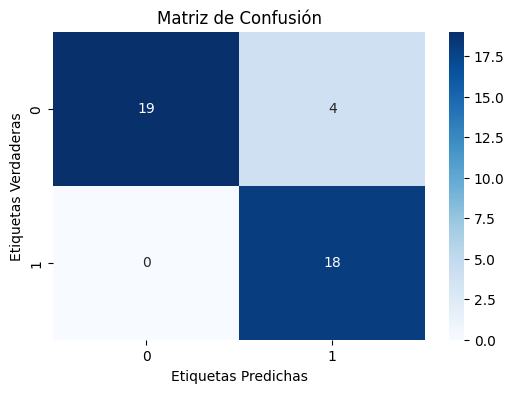

In [85]:
matriz_conf= confusion_matrix(y_test, random_predict)

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_conf, annot=True, cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title('Matriz de Confusión')
plt.show()

In [84]:
# Accuracy

accuracy = accuracy_score(y_test, random_predict)

# Precision
precision = precision_score(y_test, random_predict)

# Recall
recall = recall_score(y_test, random_predict)

# F1-Score
f1 = f1_score(y_test, random_predict)

# ROC-AUC
roc_auc = roc_auc_score(y_test, random_predict)

# Printear los resultados

print("Accuracy:", round(accuracy,3))
print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
print("F1-Score:", round(f1,3))
print("ROC-AUC:", round(roc_auc,3))

Accuracy: 0.902
Precision: 0.818
Recall: 1.0
F1-Score: 0.9
ROC-AUC: 0.913


In [48]:
nombres_variables = x_train.columns
importancias = random_cls.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

La importancia de las características en el modelo de Random Forest:
symboling: 0.01
wheelbase: 0.05
carlength: 0.05
carwidth: 0.1
carheight: 0.02
curbweight: 0.13
enginesize: 0.06
boreratio: 0.02
stroke: 0.01
compressionratio: 0.01
horsepower: 0.09
peakrpm: 0.0
citympg: 0.06
highwaympg: 0.08
price: 0.21
fueltype_diesel: 0.0
fueltype_gas: 0.0
aspiration_std: 0.01
aspiration_turbo: 0.01
doornumber_four: 0.0
doornumber_two: 0.0
carbody_convertible: 0.01
carbody_hardtop: 0.0
carbody_hatchback: 0.0
carbody_sedan: 0.0
carbody_wagon: 0.0
drivewheel_4wd: 0.0
drivewheel_fwd: 0.01
drivewheel_rwd: 0.02
enginelocation_front: 0.0
enginelocation_rear: 0.0
enginetype_dohc: 0.0
enginetype_dohcv: 0.0
enginetype_l: 0.0
enginetype_ohc: 0.0
enginetype_ohcf: 0.0
enginetype_ohcv: 0.0
enginetype_rotor: 0.0
cylindernumber_eight: 0.0
cylindernumber_five: 0.0
cylindernumber_four: 0.0
cylindernumber_six: 0.0
cylindernumber_three: 0.0
cylindernumber_twelve: 0.0
cylindernumber_two: 0.0
fuelsystem_1bbl: 0.0
fuelsy